In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleaned_data_Linear.csv')
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-0.953538,0,0.109877,0,4.024953,1.683039,4.016394,-0.739109,-1.419814,1,...,1,0,0,1,0,0,0,1,0,0
1,-1.118963,0,-3.060977,0,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.457264,0,-3.038339,3,-0.646600,0.625557,3.443074,-0.739109,0.047412,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.788113,0,0.294612,0,4.024953,1.417829,3.443074,-0.996863,0.840507,1,...,0,0,0,1,0,0,1,0,0,0
4,-0.622689,1,-0.041235,1,4.024953,1.095549,4.475050,-0.481354,-0.924130,1,...,1,0,0,1,0,0,1,0,0,0


In [3]:
X = df.drop('loan_status' , axis=1)
y = df['loan_status']

# Handling Imbalanced Loan status

In [4]:
from imblearn.over_sampling import SMOTENC

# Identify categorical feature names after one-hot encoding
categorical_features = ['person_gender', 
                        'person_education_Bachelor', 'person_education_Doctorate',
                        'person_education_High School', 'person_education_Master',
                        'person_home_ownership_OTHER', 'person_home_ownership_OWN',
                        'person_home_ownership_RENT', 'loan_intent_EDUCATION',
                        'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
                        'loan_intent_PERSONAL', 'loan_intent_VENTURE',
                        'previous_loan_defaults_on_file_Yes']

# Get categorical feature indices
cat_indices = [X.columns.get_loc(col) for col in categorical_features]

# Apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=cat_indices, sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Check new class distribution
print("New class distribution:")
print(pd.Series(y_resampled).value_counts())

New class distribution:
loan_status
1    35000
0    35000
Name: count, dtype: int64


## Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

# Modelling

In [7]:
# Hyperparameter Tuning

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

estimator = SVC()
param_grid = {'C':[1,10]}
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
svm_grid.fit(X_train,y_train)

#SVM with best Hyperparameter
svm_grid.best_estimator_

SVC(C=10)

In [8]:
svm_grid.best_params_

{'C': 10}

In [9]:
# Modelling

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = svm_grid.best_estimator_
model.fit(X_train, y_train)

#Predict train data
ypred_train = model.predict(X_train)
print('Train Accuracy :', accuracy_score(y_train,ypred_train))

print('CV Score : ', cross_val_score(model, X_train,y_train, cv=5, scoring='accuracy').mean())

#Predict & Evaluation on test data
ypred_test = model.predict(X_test)
print('Test Accuracy : ', accuracy_score(y_test, ypred_test))

Train Accuracy : 0.9111964285714286
CV Score :  0.9073214285714286
Test Accuracy :  0.9047857142857143


In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[6125  898]
 [ 435 6542]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7023
           1       0.88      0.94      0.91      6977

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000



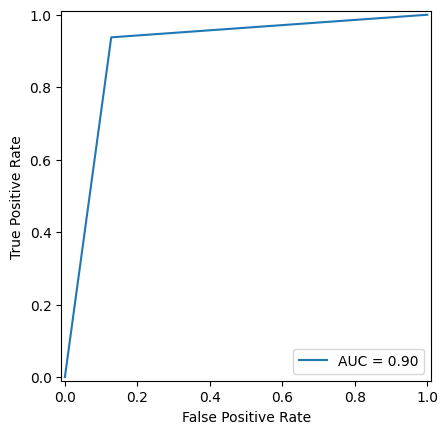

In [11]:
from sklearn.metrics import roc_curve,auc, RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

In [12]:
#AUC Score

from sklearn.metrics import roc_auc_score
print('AUC Score : ', roc_auc_score(y_test, ypred_test))

AUC Score :  0.9048933507873993
